# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([  8.8960e-01,   1.6298e-01,   3.5110e-01,   7.4791e-01,   7.3383e-02,   2.8007e-01,
         8.8938e-01,   3.0870e-01,   2.8177e-01,   5.4389e-01,   5.4153e-01,   1.6799e-02,
         5.6049e-01,   6.9311e-01,   4.7038e-01,   2.0475e-01,   3.9993e-05,   6.0445e-01,
         1.8002e-01,   9.3812e-01,   8.4744e-01,   8.3275e-01,   7.4399e-01,   6.6789e-01,
         5.2824e-01,   6.5846e-01,   8.4447e-01,   4.8528e-01,   7.3291e-01,   4.2410e-01])

In [6]:
y

array([ 10.6688,   8.489 ,   9.0533,  10.2437,   8.2201,   8.8402,  10.6681,   8.9261,   8.8453,
         9.6317,   9.6246,   8.0504,   9.6815,  10.0793,   9.4112,   8.6143,   8.0001,   9.8133,
         8.54  ,  10.8144,  10.5423,  10.4983,  10.232 ,  10.0037,   9.5847,   9.9754,  10.5334,
         9.4558,  10.1987,   9.2723])

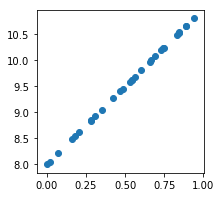

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1365

In [ ]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [ ]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani